# NumPy

In [1]:
import numpy
numpy.__version__

'1.26.4'

## Pythonのデータ型

In [2]:
# Pythonコード
result = 0
for i in range(100):
    result += i

* pythonでは、1つの整数変数は4つの部品から構成されている

```text
    ob_refcnt
        Pythonがメモリの割り当てと解除を自動的に行うための参照カウンタ
    ob_type
        変数の型を表すコード
    ob_size
        この後に続くデータの大きさ
    ob_digit
        このPython変数が持つ実際の整数値
```


In [3]:
# Pythonの型固定配列
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 'i'は整数型

In [4]:
# numpyの型固定配列
import numpy as np
# Integer array
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

* Pythonリストとは異なりNumPy配列の要素はすべて同じ型という制約がある
* 型が一致しない場合、可能であればNumpyはアップキャストする(下記は整数から浮動小数点数)

In [5]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [6]:
# データ型の指定
np.array([1, 2, 3, 4], dtype=np.float32)

array([1., 2., 3., 4.], dtype=float32)

In [7]:
# 多次元の配列
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### NumPy配列の作成

* 大きな配列の場合、NumPyに組み込まれた関数を使用して配列を最初から作成する方が効率的。

In [8]:
# 要素がすべて0で長さ10の整数配列を作る
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# 要素がすべて1である3行5列の浮動小数点配列を作る
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
# 要素がすべて3.14である3行5列の配列を作る
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [11]:
# 開始値0、終了値20で2ずつ増加する
# 線形シーケンス配列を作る
# (組み込みのrange()関数と同じ働きをする)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
# 0と1の間に均等に配置された5つの値の配列を作る
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
# 0と1の間に3行3列の一様分布疑似乱数配列を作る
np.random.random((3,3))

array([[0.95713877, 0.03058382, 0.93624572],
       [0.19259534, 0.6898117 , 0.72757085],
       [0.35040244, 0.14468244, 0.10155237]])

In [14]:
# 平均値0と標準偏差1の正規分布乱数で3行3列の配列を作る
np.random.normal(0, 1, (3, 3))

array([[-0.85570103,  0.24379475,  1.49034067],
       [ 1.60472264, -0.11353845,  0.80411467],
       [ 1.53054845, -1.19934838, -1.80498983]])

In [15]:
# 区間[0, 10]のランダムな整数で3行3列の配列を作る
np.random.randint(0, 10, (3, 3))

array([[2, 6, 7],
       [4, 3, 0],
       [9, 3, 4]])

In [16]:
# 3行3列の単位行列を作る
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
# 3つの整数の初期化されていない配列を作る
# 各要素の数は、そのメモリ位置に既に存在していたものになる
np.empty(3)

array([1., 1., 1.])

### NumPyの標準データ型
* NumPy配列の値はすべて同じ型
* 文字列で指定 or NumPyオブジェクトを使用する
    ```Python
    np.zeros(10, dtype='int16')
    # or
    np.zeros(10, dtype=np.int16)
    ```

* NumPyデータ型
  * 論理型
    * bool_ : 論理型(True or False) 1バイトに格納される
  * 整数型
    * int_ : デフォルトの整数型(C言語のlong)
    * intc : C言語のintと同じ
    * intp : インデクスに使用するための整数(C言語のssize_tと同様。通常int64 or int32)
    * int8 : -128から127
    * int16 : -32,768から32,767
    * int32 : -2,147,483,648から2,147,483,647
    * int64 : -9,223,372,036,854,775,808から9,223,372,036,854,775,807
  * 整数型(自然数)
    * uint8 : 0から255
    * uint16 : 0から65,535
    * uint32 : 0から4,294,967,295
    * uint64 : 0から18,446,744,073,709,551,615
  * 浮動小数点数型
    * float_ : float64の略
    * float16 : 符号部1ビット, 指数部5ビット, 仮数部10ビット
    * float32 : 符号部1ビット, 指数部8ビット, 仮数部23ビット
    * float16 : 符号部1ビット, 指数部11ビット, 仮数部52ビット


## NumPy配列の基礎

### NumPy配列の属性

In [18]:
rng = np.random.default_rng(seed=1701)  # 同じ乱数を得るために
                                        # 乱数シードを設定
x1 = rng.integers(10, size=6)           # 1次元配列
x2 = rng.integers(10, size=(3, 4))      # 2次元配列
x3 = rng.integers(10, size=(3, 4, 5))   # 3次元配列

In [19]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:   ", x3.dtype)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype:    int64


* 配列は、属性としてndim(次元数)、shape(各次元のサイズ)、size(配列の合計サイズ)、dtype(要素の型)を持つ

### 配列インデクス:配列の要素にアクセスする

* Pythonリストと同様に目的のインデクスを角括弧で囲む

In [20]:
x1

array([9, 4, 0, 3, 8, 6], dtype=int64)

In [21]:
x1[0]

9

In [22]:
x1[-1]

6

In [23]:
x1[-2]

8

In [24]:
x2

array([[3, 1, 3, 7],
       [4, 0, 2, 3],
       [0, 0, 6, 9]], dtype=int64)

In [25]:
x2[0,0]

3

In [26]:
x2[2, 0]

0

In [27]:
x2[2,-1]

9

In [28]:
# インデクス表記を使用し、要素の値を変更できる
x2[0, 0] = 12
x2

array([[12,  1,  3,  7],
       [ 4,  0,  2,  3],
       [ 0,  0,  6,  9]], dtype=int64)

* Pythonリストと異なり、NumPy配列は型が固定されていることに注意すること

In [29]:
# 小数点以下が切り捨てられる
x1[0] = 3.14159
x1

array([3, 4, 0, 3, 8, 6], dtype=int64)

### 配列のスライス:部分配列にアクセスする
* NumPyでもPythonと同様にスライスでアクセスできる
```Python
    x[start:stop:step]
```

#### 1次元配列のスライス

In [30]:
x1

array([3, 4, 0, 3, 8, 6], dtype=int64)

In [31]:
x1[:3] # 最初の3要素

array([3, 4, 0], dtype=int64)

In [32]:
x1[3:] # インデクス3以降の要素

array([3, 8, 6], dtype=int64)

In [33]:
x1[1:4] # 中央の部分配列

array([4, 0, 3], dtype=int64)

In [34]:
x1[::2] # 1つおきの要素

array([3, 0, 8], dtype=int64)

In [35]:
x1[1::2] # インデクス1から始まる1つおきの要素

array([4, 3, 6], dtype=int64)

In [36]:
x1[::-1] # 逆順にすべての要素

array([6, 8, 3, 0, 4, 3], dtype=int64)

In [37]:
# array([3, 4, 0, 3, 8, 6], dtype=int64)
x1[4::-2] # インデクス4から逆順に1つおきの要素

array([8, 0, 3], dtype=int64)

In [38]:
# インデックス値間違えないように
x1[4]

8

#### 多次元配列のスライス

In [39]:
x2

array([[12,  1,  3,  7],
       [ 4,  0,  2,  3],
       [ 0,  0,  6,  9]], dtype=int64)

In [40]:
x2[:2, :3] # 最初の2行と3列

array([[12,  1,  3],
       [ 4,  0,  2]], dtype=int64)

In [41]:
x2[:3, ::2] # 3行と、1つおきの列

array([[12,  3],
       [ 4,  2],
       [ 0,  6]], dtype=int64)

In [42]:
x2[::-1, ::-1] # 逆順にすべての行と列

array([[ 9,  6,  0,  0],
       [ 3,  2,  0,  4],
       [ 7,  3,  1, 12]], dtype=int64)

* 配列のアクセスに関して、最も頻繁に行われる操作は、行または列の抽出
* 1つの：による空のスライスと目的のインデクスを組み合わせる

In [43]:
x2[:, 0] # x2の最初の列

array([12,  4,  0], dtype=int64)

In [44]:
x2[0, :] # x2の最初の行

array([12,  1,  3,  7], dtype=int64)

* 行にアクセスする場合、からのスライスを省略できる

In [45]:
x2[0] # x2[0, :]と等価

array([12,  1,  3,  7], dtype=int64)

#### コピーではなくビューである部分配列

* スライスは配列データのコピーではなくビューである点に注意すること
* NumPyとPythonの違う点の1つ
* リストはコピーを作る

In [46]:
x2

array([[12,  1,  3,  7],
       [ 4,  0,  2,  3],
       [ 0,  0,  6,  9]], dtype=int64)

In [47]:
x2_sub = x2[:2, :2]
x2_sub

array([[12,  1],
       [ 4,  0]], dtype=int64)

In [48]:
x2_sub[0, 0] = 99
x2_sub

array([[99,  1],
       [ 4,  0]], dtype=int64)

In [49]:
x2

array([[99,  1,  3,  7],
       [ 4,  0,  2,  3],
       [ 0,  0,  6,  9]], dtype=int64)

#### 配列のコピー

In [50]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[99,  1],
       [ 4,  0]], dtype=int64)

In [51]:
x2_sub_copy[0, 0] = 42
x2_sub_copy

array([[42,  1],
       [ 4,  0]], dtype=int64)

In [52]:
x2

array([[99,  1,  3,  7],
       [ 4,  0,  2,  3],
       [ 0,  0,  6,  9]], dtype=int64)

### 配列の形状変更
* 配列の形状変更はreshapeメソッドを使う

In [53]:
grid = np.arange(1, 10).reshape(3, 3)
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

* 注意として最初の配列の要素数と、変更後の要素数が一致しないといけない
* reshapeメソッドは、可能であれば初期配列のコピー出なくビューを返す

In [54]:
x = np.array([1, 2, 3])
x.reshape((1, 3)) # reshapeを用いた行ベクトルの作成

array([[1, 2, 3]])

In [55]:
x.reshape((3, 1)) # reshapeを用いた列ベクトルの作成

array([[1],
       [2],
       [3]])

* スライスにnp.newaxisを組み合わせて同じ操作ができる

In [56]:
x[np.newaxis, :]    # newaxisを用いた行ベクトルの作成

array([[1, 2, 3]])

In [57]:
x[:, np.newaxis]    # newaxisを用いた列ベクトルの作成

array([[1],
       [2],
       [3]])

### 配列の連結と分割

#### 配列の連結

In [58]:
# concatenateを使った連結
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [59]:
# 一度に2つ以上の配列を連結することもできる
z = np.array([99, 99, 99])
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [60]:
# 2次元配列にも有効
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
# 第1の軸に沿って連結する
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [61]:
# 第2の軸に沿って連結する
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [62]:
# 配列を垂直に重ねる
np.vstack([x, grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [63]:
# 配列を水平に重ねる
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 99]])

#### 配列の分割

In [64]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
# インデックス位置で分割できる
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


* N個の分割点を与えるとN+1個の配列に分割される

In [65]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [66]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [67]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


* np.dsplitは第3の軸に沿って配列を分割する

## NumPy配列の計算:ユニバーサル関数
* データ配列に対する計算

In [68]:
import numpy as np
rng = np.random.default_rng(seed=1701)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = rng.integers(1, 10, size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [69]:
big_array = rng.integers(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

821 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### ufuncの基礎

* 様々な種類の操作に対して、静的型付きでコンパイルされたか数への便利なインターフェースをNumPyは提供する
* ベクトル化演算として知られている

In [70]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [71]:
%timeit (1.0 / big_array)

1.87 ms ± 95.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [72]:
# 配列同士の操作も可能
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [73]:
# 多次元でも同様
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

#### 配列計算

In [74]:
x = np.arange(4)
print(
    f"x      ={x}",
    f"x + 5  ={x + 5}",
    f"x - 5  ={x - 5}",
    f"x * 2  ={x * 2}",
    f"x / 2  ={x / 2}",
    f"x // 2 ={x // 2}",
    sep= '\n'
)

x      =[0 1 2 3]
x + 5  =[5 6 7 8]
x - 5  =[-5 -4 -3 -2]
x * 2  =[0 2 4 6]
x / 2  =[0.  0.5 1.  1.5]
x // 2 =[0 0 1 1]


In [75]:
print(
    f"-x     ={-x}",
    f"x ** 2 ={x ** 2}",
    f"x % 2  ={x % 2}",
    sep='\n'
)

-x     =[ 0 -1 -2 -3]
x ** 2 =[0 1 4 9]
x % 2  =[0 1 0 1]


In [76]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [77]:
np.add(x, 2)

array([2, 3, 4, 5])

演算子 | 等価なufunc | 説明
:-: | :-: | :-:
\+ | np.add | 加算 1 + 1 = 2
\- | np.subtract | 減算 3 - 2 = 1
\- | np.negative | 単項マイナス -2
\* | np.multiply | 乗算 2 * 3 = 6
/ | np.divide   | 除算 3 / 2 = 1.5
//| np.floor_divide | 単数除算 3 // 2 = 1
**| np.power | べき乗 2 ** 3 = 8
% | np.mod | 剰余 9 % 4 = 1

### 絶対値

In [78]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [79]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [80]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [81]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
# 複素数の絶対値は√a^2+b^2
np.abs(x)

array([5., 5., 2., 1.])

### 三角関数
* 注意:角度はラジアン基準

In [82]:
theta = np.linspace(0, np.pi, 3)
print(
    f"theta      = {theta}",
    f"sin(theta) = {np.sin(theta)}",
    f"cos(theta) = {np.cos(theta)}",
    f"tan(theta) = {np.tan(theta)}",
    sep='\n'
    )

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [83]:
# 逆三角関数
x = [-1, 0, 1]
print(
    f"x         = {x}",
    f"arcsin(x) = {np.arcsin(x)}",
    f"arccos(x) = {np.arccos(x)}",
    f"arctan(x) = {np.arctan(x)}",
    sep='\n'
    )

x         = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


### 指数関数と対数関数

In [84]:
x = [1, 2, 3]
print(
    f"x   ={x}",
    f"e^x ={np.exp(x)}",
    f"2^x = {np.exp2(x)}",
    f"3^x = {np.power(3., x)}",
    sep='\n'
    )

x   =[1, 2, 3]
e^x =[ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


In [85]:
x = [1, 2, 4, 10]
print(
    f"x        = {x}",
    f"ln(x)    = {np.log(x)}",
    f"log2(x)  = {np.log2(x)}",
    f"log10(x) = {np.log10(x)}",
    sep='\n'
)

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [86]:
# 非常に小さな入力値に対して精度を維持するための指示
x = [0, 0.001, 0.01, 0.1]
print(
    f"exp(x) - 1 = {np.expm1(x)}",
    f"log(1 + x) = {np.log1p(x)}",
    sep='\n'
)

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### 専門的な計算

In [87]:
from scipy import special

In [88]:
# ガンマ関数(階乗を一般化したもの)および関連する関数
x = [1, 5, 10]
print(
    f"gamma(x)     = {special.gamma(x)}",
    f"ln|gamma(x)| = {special.gammaln(x)}",
    f"beta(x, 2)   = {special.beta(x, 2)}",
    sep='\n'
)

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [89]:
# 誤差関数(ガウス関数の積分)および
# 相補誤差関数と逆誤差関数
x = np.array([0, 0.3, 0.7, 1.0])
print(
    f"erf(x)    = {special.erf(x)}",
    f"erfc(x)   = {special.erfc(x)}",
    f"erfinv(x) = {special.erfinv(x)}",
    sep='\n'
)

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### ufuncの特別な機能

In [90]:
# 出力の指定
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [91]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [92]:
# 集約
# reduceは結果が1つになるまで繰り返し演算する
x = np.arange(1, 6)
np.add.reduce(x)

15

In [93]:
np.multiply.reduce(x)

120

In [94]:
# 中間結果を残したい場合はaccumulateを使う
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [95]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [96]:
# 直積
# 2つの入力すべての要素間で計算ができる
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## 集約:最大、最小、その他データの性質を表すもの

### 配列の合計

In [97]:
# 配列の合計
rng = np.random.default_rng()

In [98]:
L = rng.random(100)
sum(L)

48.96506748288296

In [99]:
np.sum(L)

48.96506748288298

In [100]:
# sum()よりnp.sum()の方が高速
big_array = rng.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

41.5 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
222 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


* 注意:オプションの意味が異なる
* sum(x,1)は合計を1で初期化する
* np.sum(x, 1)は軸1に沿って合計する

### 最大と最小

In [101]:
min(big_array), max(big_array)

(4.206700349729253e-06, 0.9999998215472461)

In [102]:
# numpyの場合
np.min(big_array), np.max(big_array)

(4.206700349729253e-06, 0.9999998215472461)

In [103]:
%timeit min(big_array)
%timeit np.min(big_array)

28.2 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
127 µs ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [104]:
print(big_array.min(), big_array.max(), big_array.sum())

4.206700349729253e-06 0.9999998215472461 499482.6613294792


In [105]:
# 多次元配列の集約
M = rng.integers(0, 10, (3, 4))
print(M)

[[3 6 5 8]
 [8 9 3 5]
 [3 3 2 0]]


In [106]:
M.sum()

55

In [107]:
print(
    M.min(axis=0),  # 各列の最小値
    M.min(axis=1),  # 各行の最小値
    sep='\n'
    )

[3 3 2 0]
[3 3 0]


### 集約関数一覧
関数名|Nanセーフver|説明
:-:|:-:|:-:
np.sum|np.nansum|要素の合計
np.prod|np.nanprod|要素の積
np.mean|np.nanmean|要素の平均値
np.std|np.nanstd|要素の標準偏差
np.var|np.nanvar|要素の分散
np.min|np.nanmin|要素の最小値
np.max|np.nanmax|要素の最大値
np.argmin|np.nanargmin|最小値のインデクス
np.argmax|np.nanargmax|最大値のインデクス
np.median|np.nanmedian|要素の中央値
np.percentile|np.nanpercentile|パーセンタイル
np.any|N/A|いずれかの要素がtrueであるか
np.aall|N/A|すべての要素がtrueであるか


#### 事例:米国大統領の平均身長について

In [108]:
# jupyter notebookでpowershellを指定してあげること
# しないと出力が文字化けする
import os
os.environ['comspec'] = 'powershell.exe'

!Get-content .\president_heights.csv -head 4


order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [109]:
import pandas as pd
data = pd.read_csv('./president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [110]:
print(
    f"Mean height:       {heights.mean()}",
    f"Standard deviation:{heights.std()}",
    f"Minimum height:    {heights.min()}",
    f"Maximum height:    {heights.max()}",
    sep='\n'
)

Mean height:       180.04545454545453
Standard deviation:6.983599441335736
Minimum height:    163
Maximum height:    193


In [111]:
print(
    f"25th percentile:   {np.percentile(heights, 25)}",
    f"Median:            {np.median(heights)}",
    f"75th percentile:   {np.percentile(heights, 75)}",
    sep='\n'
)

25th percentile:   174.75
Median:            182.0
75th percentile:   183.5


In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_fontja

plt.style.use('seaborn-v0_8-whitegrid')

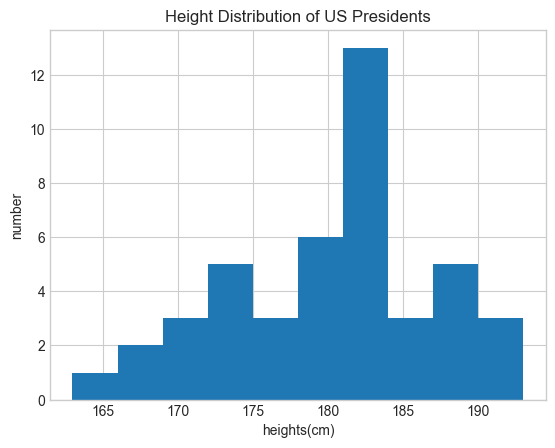

In [113]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('heights(cm)')
plt.ylabel('number');

### ブロードキャストの基礎

In [115]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [116]:
a + 5

array([5, 6, 7])

In [118]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [119]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [120]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [121]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### ブロードキャストのルール
1. 2つの配列の次元数が異なる場合、次元数の少ない方の形状は戦闘(左側)に1を補い次元数を揃える
2. 2つの配列の形状がいずれの次元でも一致しない場合、各次元のうち長さが1に等しい次元は、他方の配列計上と一致するように引き延ばされる
3. いずれかの次元でサイズが不一致であり、長さが1に等しくもない場合は、エラーとなる

In [125]:
# ブロードキャスト例1
M = np.ones((2, 3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [126]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [127]:
# ブロードキャスト例2
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [128]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [129]:
# ブロードキャスト例3
# 形状一致しないのでエラーになる
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [130]:
# M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

* aは形状3,3となりMは3,2のためルールが適用されなくなりエラーとなる

In [131]:
# もし解決するなら
a[:, np.newaxis].shape

(3, 1)

In [133]:
a[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [132]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])